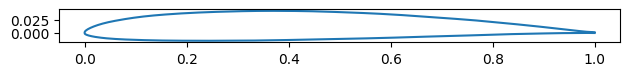

45.253675485416764

In [6]:
from utils import *
af = np.loadtxt('samplesP5B/Airfoils1D_58899_0.70_0.dat', skiprows=1)
# af[:,1] *= 0.058/cal_thickness(af)
af = interpolate(af, 400, 3)
# af = setdownflap(af, -2, 0.7)
# af = setdownflap(af, theta=2, pose=0.65)
show_airfoil(af)
mass = 0.32
area = 0.2254
d = 0.155
perf = type2_simu(af, mass, d, area)
perf

In [ ]:
from utils import *
af = np.loadtxt('samplesP5B/DiffusionAirfoil1DTransform_72152_0.70_4.dat', skiprows=1)
af[:,1] *= 0.058/cal_thickness(af)
af = interpolate(af, 400, 3)
show_airfoil(af)
mass = 0.32
area = 0.2254
d = 0.155
perf = type2_simu(af, mass, d, area)
perf

In [ ]:
root = 1.8
tip = 0.2
span = 7.5
angle = 0.0
flappose = 0.35

def cal_offset(x, y, root, flappose, angle):
    rootflap = root * (1-flappose)
    x_flap = rootflap + np.tan(angle) * y
    d = x_flap - x * (1-flappose)
    return d

offsets = np.zeros([17,2])
n = 0
for i in np.linspace(0.2, 1.8, 17):
    offsets[n,0] = i
    offsets[n,1] = cal_offset(i, 4, root, flappose, angle)
    n += 1

offsets

In [ ]:
x = np.linspace(0,0.9,10)
y = (-(np.cos(np.pi - x * 0.5 * np.pi))) ** 0.8
plt.plot(x,y)
y * 7.5

In [ ]:
airfoil = np.loadtxt('BETTER/20150114-50 +2 d.dat', skiprows=1)
airfoil = derotate(airfoil)
lh_idx = np.argmin(airfoil[:,0])
lh_x = airfoil[lh_idx, 0]
# Get trailing head
th_x = np.minimum(airfoil[0,0], airfoil[-1,0])
# Interpolate
f_up = interp1d(airfoil[:lh_idx+1,0], airfoil[:lh_idx+1,1], kind = 'cubic')
f_low = interp1d(airfoil[lh_idx:,0], airfoil[lh_idx:,1], kind = 'cubic')
xx = np.linspace(lh_x, th_x, num=1000)
yy_up = f_up(xx)
yy_low = f_low(xx)

In [ ]:
theta = -2 * np.pi / 180
c = np.cos(theta)
s = np.sin(theta)
R = np.array([[c, -s], [s, c]])
pose = 0.7
af_down = np.zeros([1000, 2])
af_down[:,0] = xx
af_down[:,1] = yy_low
_i = yy_low.argmax()-12
flap = af_down[_i:,:]
flap_new = flap - flap[0,:]
flap_new = np.matmul(flap_new, R) + flap[0,:]
af_down_new = np.copy(af_down)
af_down_new[_i:,:] = np.copy(flap_new)
xhat, yhat = savgol_filter((af_down_new[500:,0], af_down_new[500:,1]), 100, 3)
af_down_new[500:,0] = xhat
af_down_new[500:,1] = yhat
plt.plot(af_down_new[:,0], af_down_new[:,1])
plt.plot(af_down[:,0], af_down[:,1])

In [ ]:
theta = np.arctan2(af_down_new[-1,1] - af_down[-1,1], 1)
c = np.cos(theta)
s = np.sin(theta)
R = np.array([[c, -s], [s, c]])
af_down_new = np.matmul(af_down_new, R)
plt.plot(af_down_new[:,0], af_down_new[:,1])
plt.plot(af_down[:,0], af_down[:,1])

In [ ]:
af_up = np.zeros([1000, 2])
af_up[:,0] = np.flip(xx)
af_up[:,1] = np.flip(yy_up)
af = np.zeros([1999,2])
af[:1000,:] = af_up
af[1000:,:] = af_down_new[1:,:]
af = interpolate(af, 256, 3)
show_airfoil(af)

In [ ]:
airfoil = derotate(af)
lh_idx = np.argmin(airfoil[:,0])
lh_x = airfoil[lh_idx, 0]
# Get trailing head
th_x = np.minimum(airfoil[0,0], airfoil[-1,0])
# Interpolate
f_up = interp1d(airfoil[:lh_idx+1,0], airfoil[:lh_idx+1,1], kind = 'cubic')
f_low = interp1d(airfoil[lh_idx:,0], airfoil[lh_idx:,1], kind = 'cubic')
xx = np.linspace(lh_x, th_x, num=1000)
yy_up = f_up(xx)
yy_low = f_low(xx)
theta = 2 * np.pi / 180
c = np.cos(theta)
s = np.sin(theta)
R = np.array([[c, -s], [s, c]])
pose = 0.65
af_down = np.zeros([1000, 2])
af_down[:,0] = xx
af_down[:,1] = yy_low
_i = int(pose * 1000)
flap = af_down[_i:,:]
flap_new = flap - flap[0,:]
flap_new = np.matmul(flap_new, R) + flap[0,:]
af_down_new = np.copy(af_down)
af_down_new[_i:,:] = np.copy(flap_new)
plt.plot(af_down_new[:,0], af_down_new[:,1])
plt.plot(af_down[:,0], af_down[:,1])

In [ ]:

lh_idx = np.argmin(airfoil[:,0])
lh_x = airfoil[lh_idx, 0]
# Get trailing head
th_x = np.minimum(airfoil[0,0], airfoil[-1,0])
# Interpolate
f_up = interp1d(airfoil[:lh_idx+1,0], airfoil[:lh_idx+1,1], kind = 'cubic')
f_low = interp1d(airfoil[lh_idx:,0], airfoil[lh_idx:,1], kind = 'cubic')
xx = np.linspace(lh_x, th_x, num=1000)
yy_up = f_up(xx)
yy_low = f_low(xx)

In [ ]:
theta = np.arctan2(af_down_new[-1,1] - af_down[-1,1], 1)
c = np.cos(theta)
s = np.sin(theta)
R = np.array([[c, -s], [s, c]])
af_down_new = np.matmul(af_down_new, R)
plt.plot(af_down_new[:,0], af_down_new[:,1])
plt.plot(af_down[:,0], af_down[:,1])

In [ ]:
af_up = np.zeros([1000, 2])
af_up[:,0] = np.flip(xx)
af_up[:,1] = np.flip(yy_up)
af = np.zeros([1999,2])
af[:1000,:] = af_up
af[1000:,:] = af_down_new[1:,:]
af = interpolate(af, 256, 3)
show_airfoil(af)

In [ ]:
from utils import *

def setdownflap(airfoil, theta=2, pose=0.65):
    lh_idx = np.argmin(airfoil[:,0])
    theta = theta * np.pi / 180
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    af_down = airfoil[lh_idx:,:]
    _i = np.abs(af_down[:,0] - pose).argmin()
    flap = af_down[_i:,:]
    flap = smooth_line(flap, flap.shape[0], 3)
    flap_new = flap - flap[0,:]
    flap_new = np.matmul(flap_new, R) + flap[0,:]
    af_down_new = np.copy(af_down)
    af_down_new[_i:,:] = np.copy(flap_new)
    theta = np.arctan2(af_down_new[-1,1] - af_down[-1,1], 1)
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    af_down_new = np.matmul(af_down_new, R)
    af = np.zeros_like(airfoil)
    af[:lh_idx,:] = airfoil[:lh_idx,:]
    af[lh_idx:,:] = af_down_new
    return af

def setupflap(airfoil, theta=-2, pose=0.65):
    lh_idx = np.argmin(airfoil[:,0])
    theta = theta * np.pi / 180
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    af_up = airfoil[:lh_idx,:]
    _i = np.abs(af_up[:,0] - pose).argmin()
    flap = af_up[:_i,:]
    flap = smooth_line(flap, flap.shape[0], 3)
    flap_new = flap - flap[-1,:]
    flap_new = np.matmul(flap_new, R) + flap[-1,:]
    af_up_new = np.copy(af_up)
    af_up_new[:_i,:] = np.copy(flap_new)
    theta = np.arctan2(af_up_new[0,1] - af_up[0,1], 1)
    c = np.cos(theta)
    s = np.sin(theta)
    R = np.array([[c, -s], [s, c]])
    af_up_new = np.matmul(af_up_new, R)
    af = np.zeros_like(airfoil)
    af[lh_idx:,:] = airfoil[lh_idx:,:]
    af[:lh_idx,:] = af_up_new
    return af

def smooth_line(Q, N, k, D=20, resolution=1000):
    ''' Interpolate N points whose concentration is based on curvature. '''
    res, fp, ier, msg = splprep(Q.T, u=None, k=k, s=1e-6, per=0, full_output=1)
    tck, u = res
    uu = np.linspace(u.min(), u.max(), resolution)
    x, y = splev(uu, tck, der=0)
    dx, dy = splev(uu, tck, der=1)
    ddx, ddy = splev(uu, tck, der=2)
    cv = np.abs(ddx*dy - dx*ddy)/(dx*dx + dy*dy)**1.5 + D
    cv_int = cumtrapz(cv, uu, initial=0)
    fcv = interp1d(cv_int, uu)
    cv_int_samples = np.linspace(0, cv_int.max(), N)
    u_new = fcv(cv_int_samples)
    x_new, y_new = splev(u_new, tck, der=0)
    xy_new = np.vstack((x_new, y_new)).T
    return xy_new


In [ ]:
airfoil = np.loadtxt('BETTER/20150114-50 +2 d.dat', skiprows=1)
airfoil = interpolate(airfoil, 256, 3)
show_airfoil(airfoil)
af = setdownflap(airfoil, -2, 0.7)
show_airfoil(af)
af = setupflap(af, theta=3, pose=0.6)
af = interpolate(af, 256, 3)
show_airfoil(af)

In [ ]:
airfoil = np.loadtxt('synergy2_60+3/20120105-60T85_0.6+3.dat', skiprows=1)
airfoil = interpolate(airfoil, 256, 3)

In [ ]:
lh_idx = np.argmin(af[:,0])
lh_x = af[lh_idx, 0]
# Get trailing head
th_x = np.minimum(af[0,0], af[-1,0])
# Interpolate
f_up = interp1d(af[:lh_idx+1,0], af[:lh_idx+1,1])
f_low = interp1d(af[lh_idx:,0], af[lh_idx:,1])
xx = np.linspace(lh_x, th_x, num=1000)
yy_up = f_up(xx)
yy_low = f_low(xx)
plt.plot(xx[:],yy_low[:])

lh_idx = np.argmin(airfoil[:,0])
lh_x = airfoil[lh_idx, 0]
# Get trailing head
th_x = np.minimum(airfoil[0,0], airfoil[-1,0])
# Interpolate
f_up = interp1d(airfoil[:lh_idx+1,0], airfoil[:lh_idx+1,1])
f_low = interp1d(airfoil[lh_idx:,0], airfoil[lh_idx:,1])
xx = np.linspace(lh_x, th_x, num=1000)
yy_up = f_up(xx)
yy_low = f_low(xx)
plt.plot(xx[:],yy_low[:])

In [ ]:
mass = 0.22
d = 0.135
area = 0.194
perf = type2_simu(airfoil, mass, d, area)
perf

In [ ]:
perf = type2_simu(af, mass, d, area)
perf

In [ ]:
airfoil = np.loadtxt('samplesP5B/Airfoils2D_72152_0.70_1.dat', skiprows=1)
airfoil[:,1] = airfoil[:,1] * 0.06 / cal_thickness(airfoil)
airfoil = setdownflap(airfoil, theta=2, pose=0.6)
show_airfoil(airfoil)
perf = type2_simu(airfoil, mass, d, area)
perf

In [ ]:
check_backpoint(airfoil), cal_thickness(airfoil)

In [ ]:
import re
import os
dat = re.compile('.dat')
# dat = re.compile('airfoil.*\.dat')
root = 'synergy2/'

airfoils = {}
for path, dir, files in os.walk(root):
    for file in files:
        if dat.search(file) is not None:
            airfoils['{}{}'.format(path,file)] = file.split(' +')[0]

files.sort()
for file in airfoils.keys():
    points = file
    name = airfoils[file]
    print(points, name)
    airfoil = np.loadtxt(points, skiprows=1)
    af = setdownflap(airfoil, -2, 0.7)
    af = setdownflap(af, theta=2, pose=0.65)
    np.savetxt('synergy2_65/'+name+'_0.65+2.dat', af, header=name+'_0.65+2', comments="")

In [ ]:
airfoil = np.loadtxt('BETTER/20150114-50 +2 d.dat', skiprows=1)
def interpolate(airfoil, points = 256):
    af = np.copy(airfoil)
    lh_idx = np.argmin(af[:,0])
    lh_x = af[lh_idx, 0]
    th_x = np.minimum(af[0,0], af[-1,0])
    f_up = interp1d(airfoil[:lh_idx+1,0], airfoil[:lh_idx+1,1], kind='linear')
    f_low = interp1d(airfoil[lh_idx:,0], airfoil[lh_idx:,1], kind='linear')
    x = np.linspace(0,1,points//2)
    xx_down = ((np.cos(np.pi + x * np.pi) + 1) / 2) ** 1.2 * (th_x - lh_x - 1e-10) + lh_x
    x = np.linspace(0,1,points//2+1)
    xx_up = ((np.cos(np.pi + x * np.pi) + 1) / 2) ** 1.2 * (th_x - lh_x - 1e-10) + lh_x
    # xx = np.linspace(lh_x, th_x, num=1000)
    yy_low = f_low(xx_down)
    yy_up = f_up(xx_up)
    aff = np.zeros([points,2])
    aff[:points//2,0] = np.flip(xx_up[1:])
    aff[:points//2,1] = np.flip(yy_up[1:])
    aff[points//2:,0] = xx_down
    aff[points//2:,1] = yy_low
    return aff

aff = interpolate(airfoil, 300)
show_airfoil(airfoil)
show_airfoil(aff)
plt.plot(airfoil[120:140,0], airfoil[120:140,1])
plt.plot(aff[100:160,0], aff[100:160,1])

In [ ]:
x = np.linspace(0,1,128)
y = (np.cos(np.pi + x * np.pi) + 1) / 2
plt.plot(x,y ** 1.5)

In [4]:
import numpy as np

def type2_resqrtcl(mass, diameter, area):
    g = 9.806
    viscosity = 1.5e-5
    density = 1.225
    re_sqrtcl = np.sqrt(2 * mass * g / density / area) * diameter / viscosity
    return re_sqrtcl

mass = 0.32
area = 0.2254
d = 0.155

type2_resqrtcl(mass, d, area)

49264.19270267523